# Exemplo de Projeto de Regressão Multivariada


## O que faz um carro mais eficiênte em termos de consumo?

    Sources: (a) Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition. (c) Date: July 7, 1993

Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
Relevant Information:

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous   
    (cilindradas)
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)

Acknowledgements
Dataset: UCI Machine Learning Repository Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

# 1) Importando e limpando os Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('autompg-dataset.zip')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.drop('car name', axis=1, inplace=True)

In [6]:
# Procurando o que não é numérico no meio
df[~df['horsepower'].str.isnumeric()] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [7]:
~df['horsepower'].str.isnumeric().head()

0    False
1    False
2    False
3    False
4    False
Name: horsepower, dtype: bool

In [8]:
df = df[df.horsepower != '?']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


In [10]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

# EDA

Vamos criar alguns plots simples para verificar os dados.

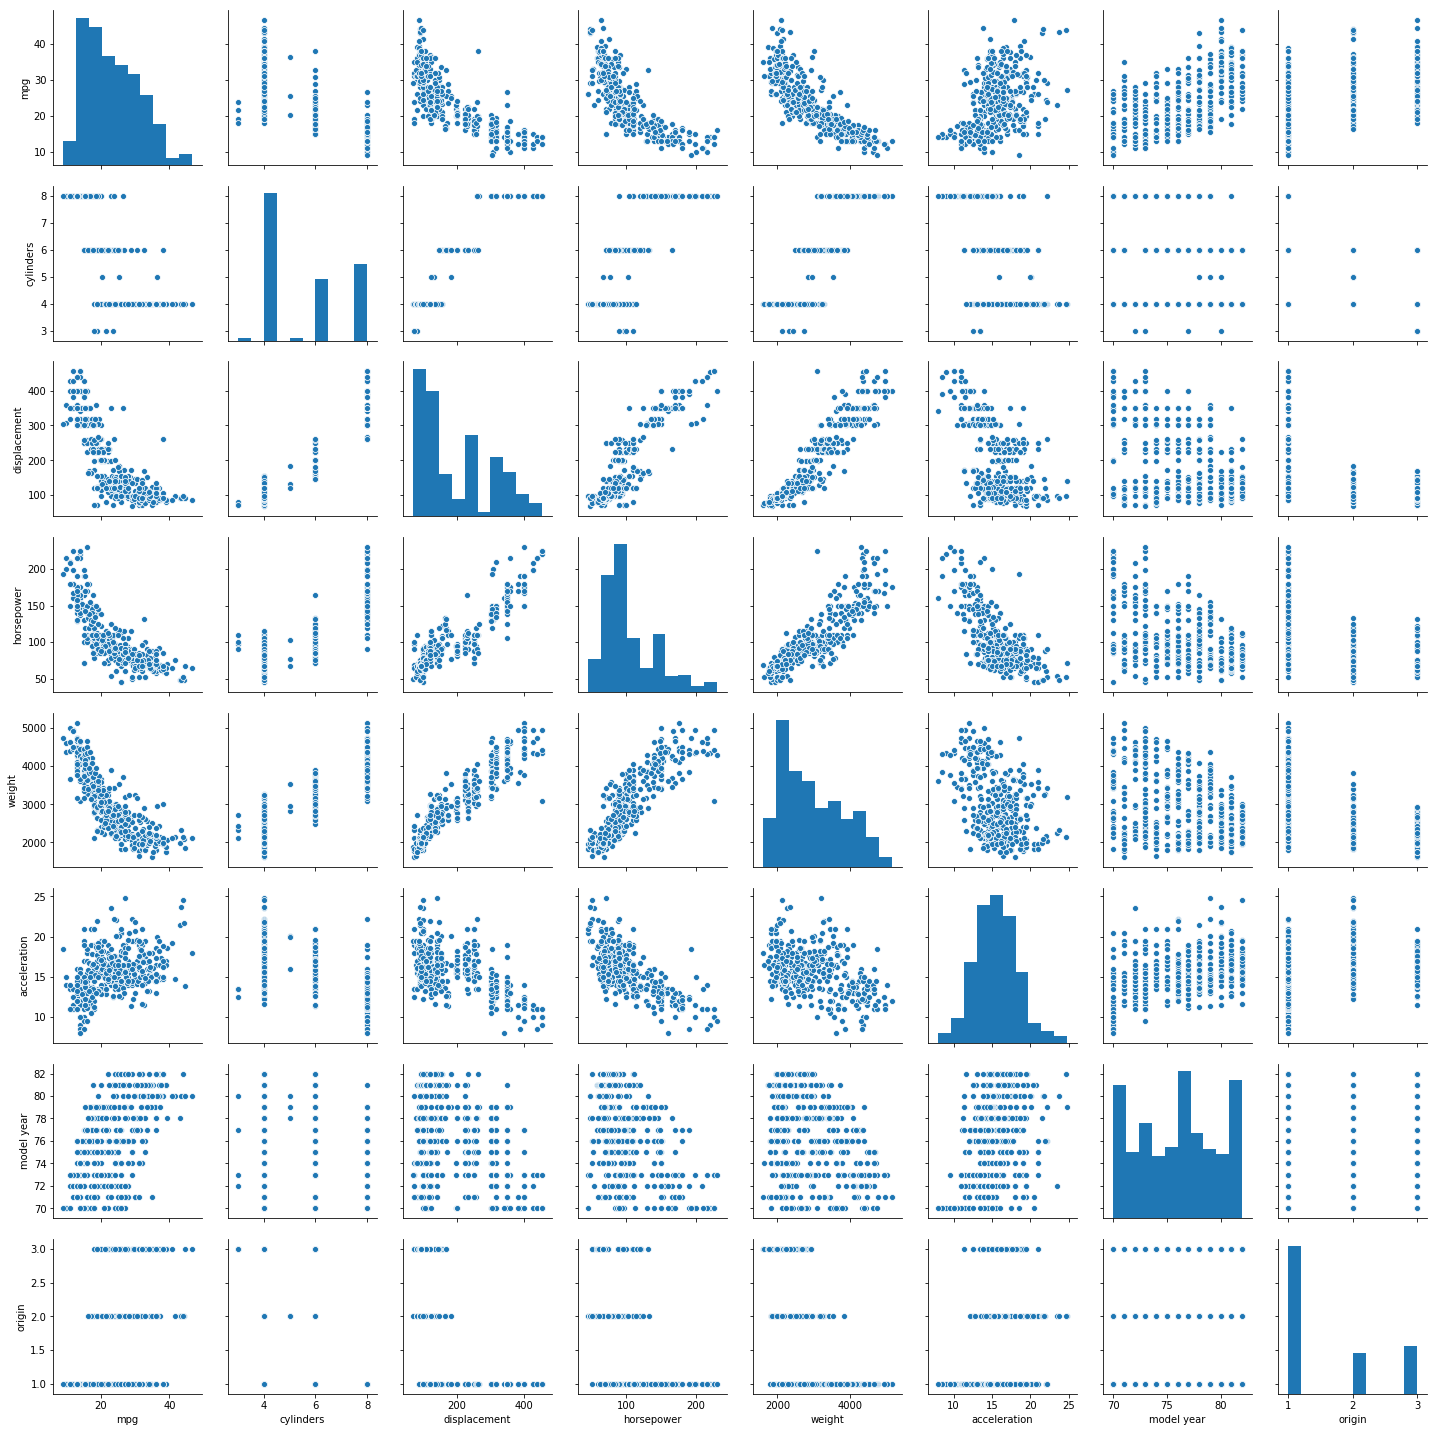

In [54]:
sns.pairplot(df);

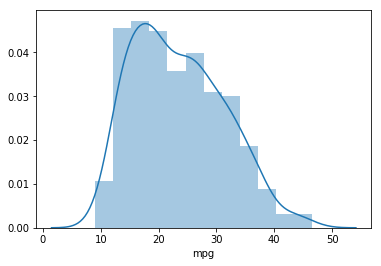

In [58]:
sns.distplot(df['mpg'])

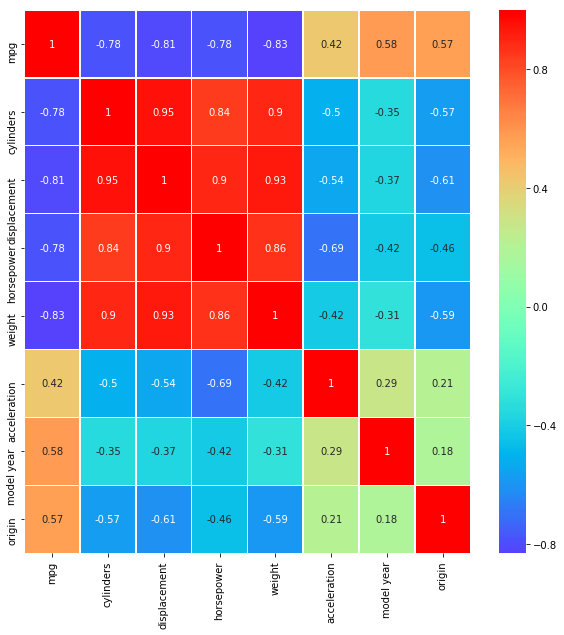

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow');

## Treinando um modelo de regressão linear



In [11]:
X = df.drop(['mpg', 'origin'], axis=1)
y = df['mpg']

## Split train - test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Criando e treinando o modelo

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
model = LinearRegression()

In [148]:
model.fit(X_train,y_train);

## Avaliação modelo

Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [149]:
# Printando a intercepção
print(model.intercept_)

-15.057758585282404


In [150]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.116173
displacement,0.001013
horsepower,-0.002276
weight,-0.006561
acceleration,0.061736
model year,0.760636


## Predições do nosso modelo

Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

In [151]:
predictions = model.predict(X_test)

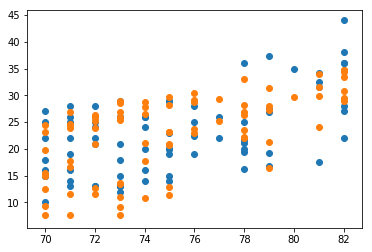

In [152]:
plt.scatter(X_test['model year'],y_test)
plt.scatter(X_test['model year'],predictions);

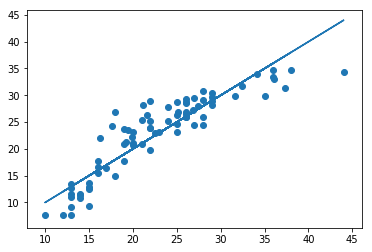

In [153]:
plt.plot(y_test,y_test)
plt.scatter(y_test, predictions);

**Histograma residual**

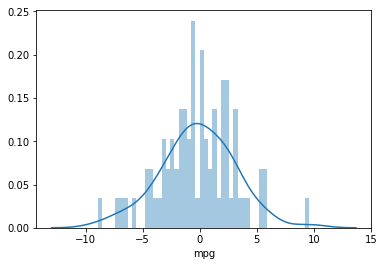

In [154]:
sns.distplot((y_test-predictions),bins=50);

## Métricas de avaliação



**Mean absolute error ** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

** Mean Squared Error ** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

** Root Mean Square Error ** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** Pune os erros maiores, o que tende a ser útil no mundo real.
- **RMSE** Transforma o MSE interpretável nas unidades "y".

#### Todas estas são "Loss functions" -> queremos minimizá-las.

In [14]:
from sklearn import metrics

In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.5038600897761274
MSE: 10.502370329417314
RMSE: 3.240736078334259


# Modelo Polinomial

In [156]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2  = model2.fit(X_train,y_train)

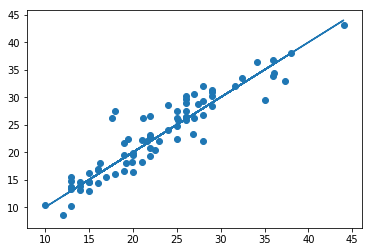

In [158]:
predictions = model2.predict(X_test)
plt.plot(y_test,y_test)
plt.scatter(y_test, predictions);

In [159]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.9791585037791275
MSE: 7.146216204190476
RMSE: 2.6732407680922563


# Regressão por modelo de "Árvores"

In [50]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=6, random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [51]:
predictions = dt.predict(X_test)

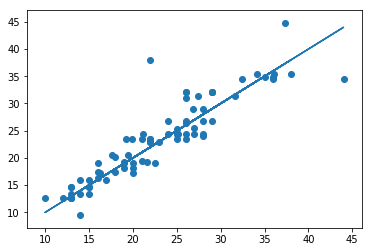

In [53]:
plt.plot(y_test,y_test)
plt.scatter(y_test, predictions);

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.121807404971962
MSE: 9.973807590785382
RMSE: 3.15813356126453
